In [1]:
import sys
from glob import glob

import time
import h5py
import zarr
import numpy as np
import pandas as pd

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from datetime import datetime, timedelta

In [5]:
import subprocess

In [6]:
lead = 12

In [7]:
start_time = time.time()

HRRRv3_lead = zarr.load(save_dir_scratch+'HRRR_{}_v3.zarr'.format(lead))

print("--- %s seconds ---" % (time.time() - start_time))

--- 1872.6712596416473 seconds ---


In [8]:
HRRRv3_lead.shape

(872, 1059, 1799, 23)

In [10]:
names = [
    'Maximum/Composite radar reflectivity:dB (instant):lambert:atmosphere:level 0',
    'MSLP (MAPS System Reduction):Pa (instant):lambert:meanSea:level 0',
    '1016:198:198 (max):lambert:heightAboveGround:level 1000 m',
    '1018:199:199 (max):lambert:heightAboveGroundLayer:levels 5000-2000 m',
    '1020:199:199 (max):lambert:heightAboveGroundLayer:levels 2000-0 m',
    '1022:199:199 (max):lambert:heightAboveGroundLayer:levels 3000-0 m',
    'Vorticity (relative):s**-1 (max):lambert:heightAboveGroundLayer:levels 2000-0 m',
    'Vorticity (relative):s**-1 (max):lambert:heightAboveGroundLayer:levels 1000-0 m',
    '1028:74:74 (max):lambert:atmosphereSingleLayer:level 0 considered as a single layer',
    '2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m',
    '2 metre dewpoint temperature:K (instant):lambert:heightAboveGround:level 2 m',
    '10 metre U wind component:m s**-1 (instant):lambert:heightAboveGround:level 10 m',
    '10 metre V wind component:m s**-1 (instant):lambert:heightAboveGround:level 10 m',
    '10 metre wind speed:m s**-1 (max):lambert:heightAboveGround:level 10 m',
    'Total Precipitation:kg m**-2 (accum):lambert:surface:level 0',
    'Convective available potential energy:J kg**-1 (instant):lambert:surface:level 0',
    'Convective inhibition:J kg**-1 (instant):lambert:surface:level 0',
    'Storm relative helicity:J kg**-1 (instant):lambert:heightAboveGroundLayer:levels 3000-0 m',
    'Storm relative helicity:J kg**-1 (instant):lambert:heightAboveGroundLayer:levels 1000-0 m',
    'Vertical u-component shear:s**-1 (instant):lambert:heightAboveGroundLayer:levels 0-1000 m',
    'Vertical v-component shear:s**-1 (instant):lambert:heightAboveGroundLayer:levels 0-1000 m',
    'Vertical u-component shear:s**-1 (instant):lambert:heightAboveGroundLayer:levels 0-6000 m',
    'Vertical v-component shear:s**-1 (instant):lambert:heightAboveGroundLayer:levels 0-6000 m'
]

In [ ]:
temp_var

### Show mean, std, 90th, 95th, and histogram

# ========== Maximum/Composite radar reflectivity:dB (instant):lambert:atmosphere:level 0 ========== #
Max: 70.25, Min: -10.0, Mean: -6.503728738534773, Std: 8.699861800076993
90th: 4.5625, 95th: 14.0625
# ========== MSLP (MAPS System Reduction):Pa (instant):lambert:meanSea:level 0 ========== #
Max: 104710.0, Min: 96473.0, Mean: 101595.09195982816, Std: 670.7552466944236
90th: 102431.0, 95th: 102736.0
# ========== 1016:198:198 (max):lambert:heightAboveGround:level 1000 m ========== #
Max: 62.625, Min: 0.0, Mean: 2.301437507256473, Std: 7.359065710650375
90th: 7.25, 95th: 20.3125
# ========== 1018:199:199 (max):lambert:heightAboveGroundLayer:levels 5000-2000 m ========== #
Max: 111.0, Min: 0.0, Mean: 0.02193213746662023, Std: 0.5118238309284052
90th: 0.0, 95th: 0.0
# ========== 1020:199:199 (max):lambert:heightAboveGroundLayer:levels 2000-0 m ========== #
Max: 31.900000000000002, Min: 0.0, Mean: 0.01064087716242889, Std: 0.21249496854143327
90th: 0.0, 95th: 0.0
# ========== 1022:199:199

/glade/scratch/ksha/ipykernel_23393/3991536437.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12, 5))


# ========== Vertical v-component shear:s**-1 (instant):lambert:heightAboveGroundLayer:levels 0-6000 m ========== #
Max: 73.55252838134766, Min: -62.95582580566406, Mean: 0.08753957583432855, Std: 11.257751623868323
90th: 13.121157836914055, 95th: 18.415708732604923


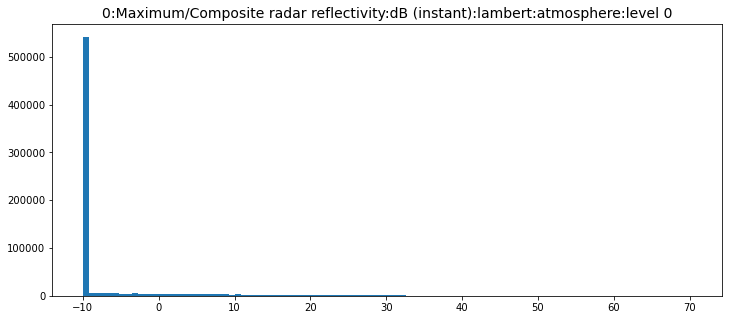

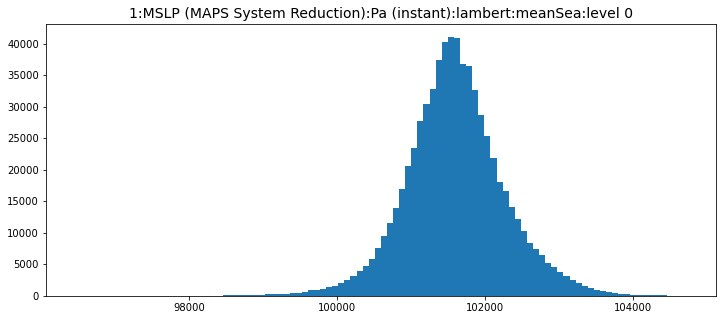

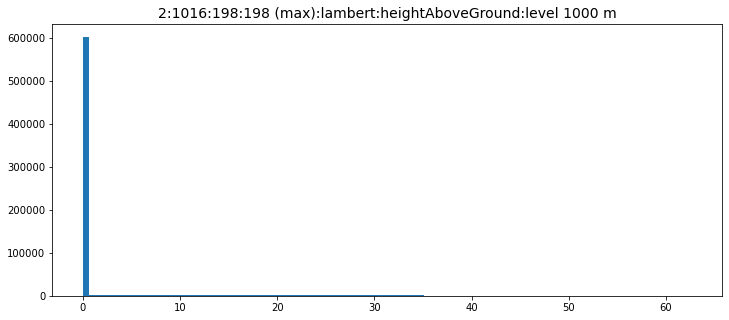

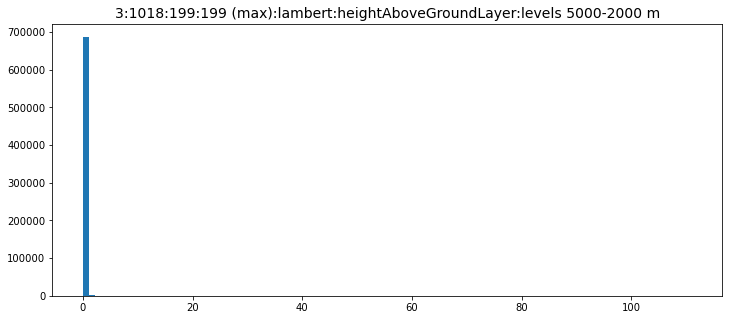

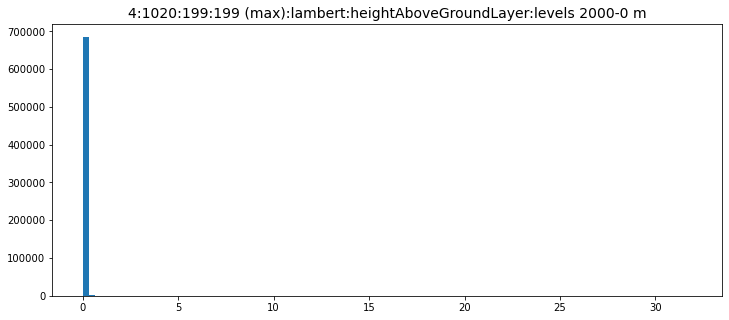

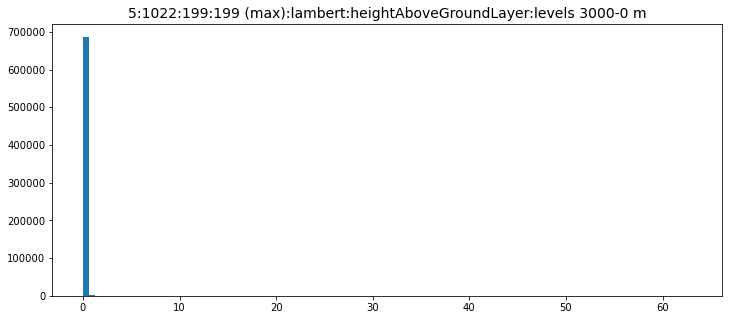

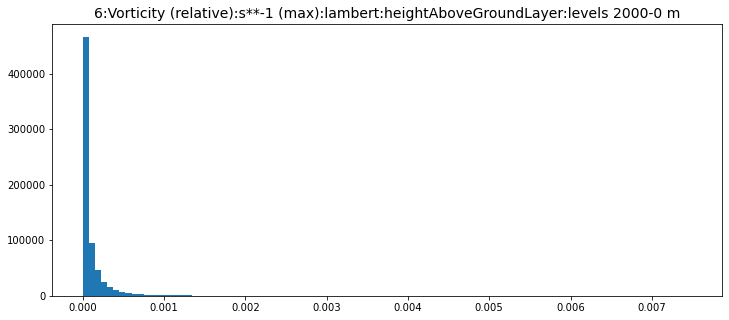

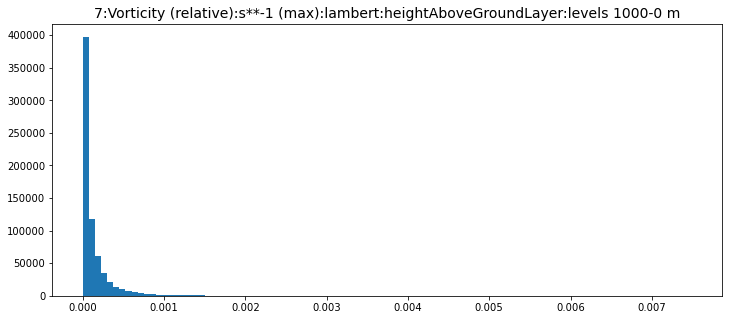

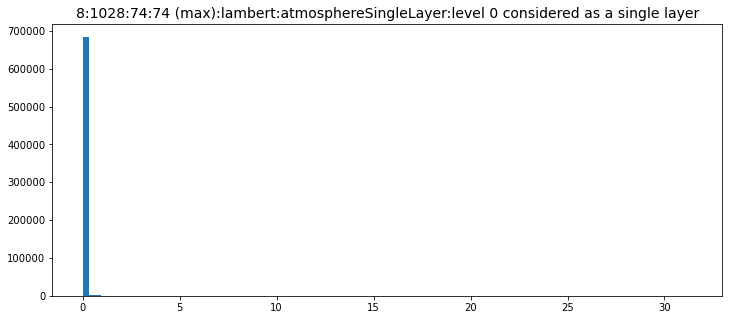

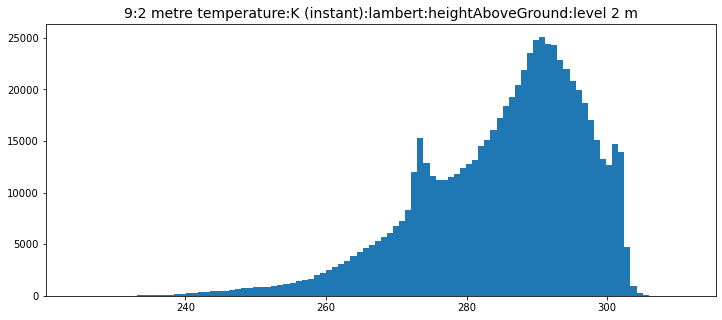

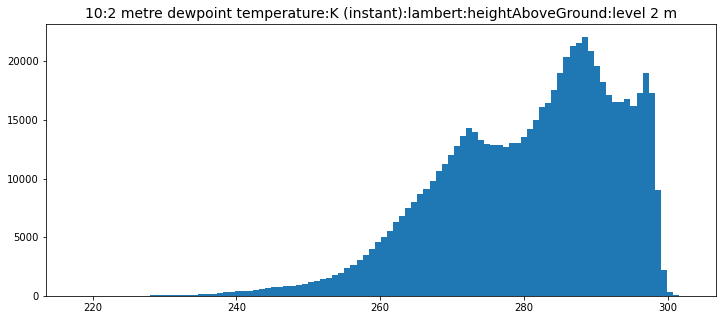

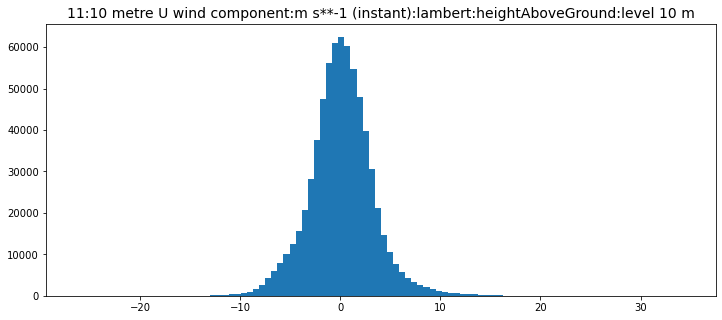

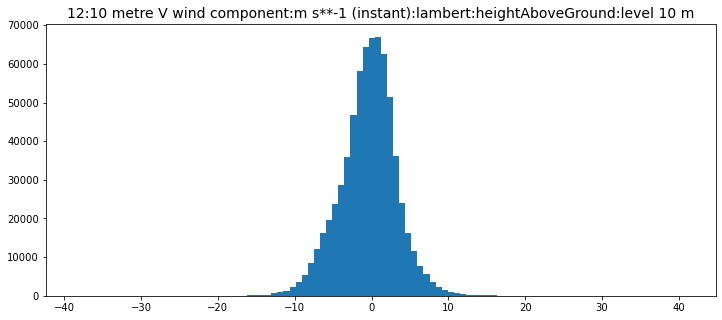

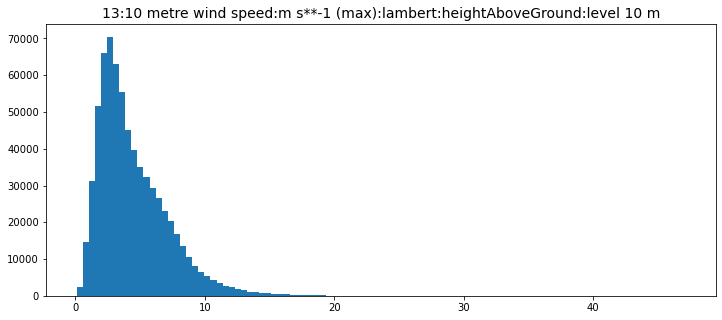

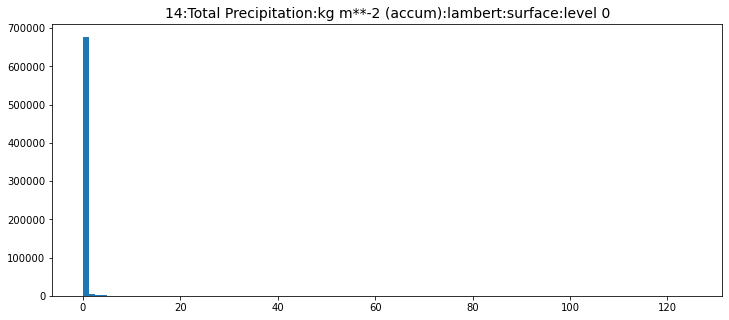

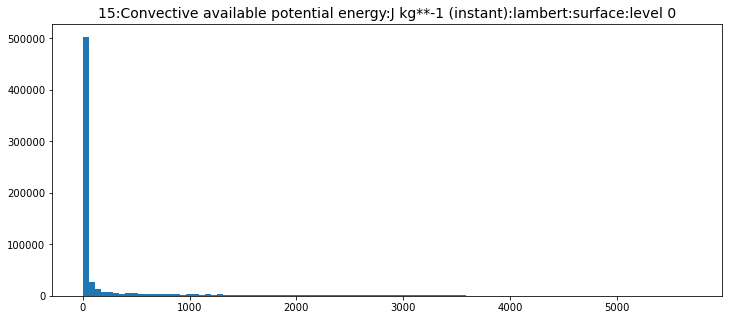

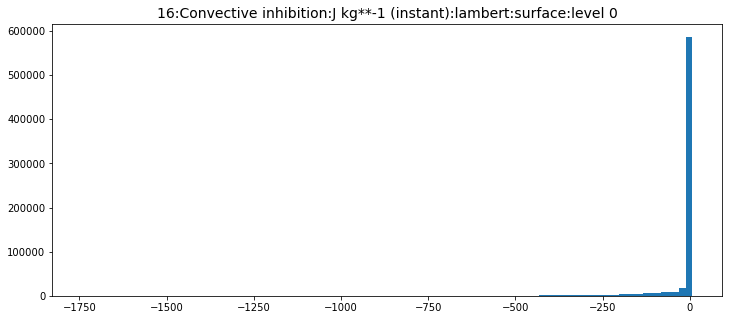

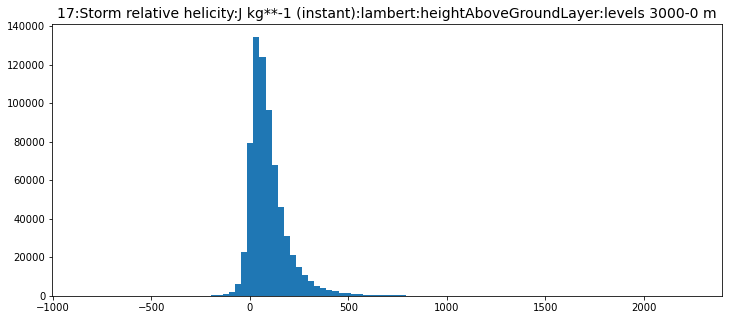

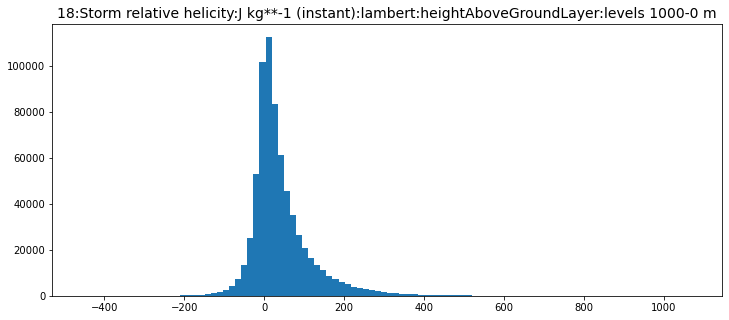

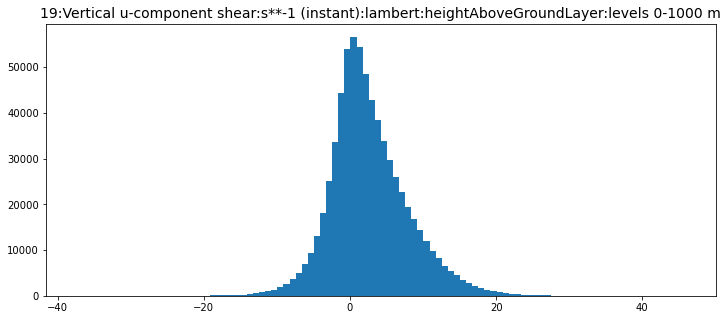

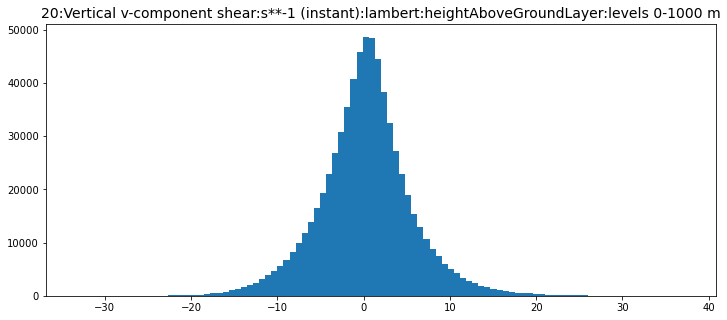

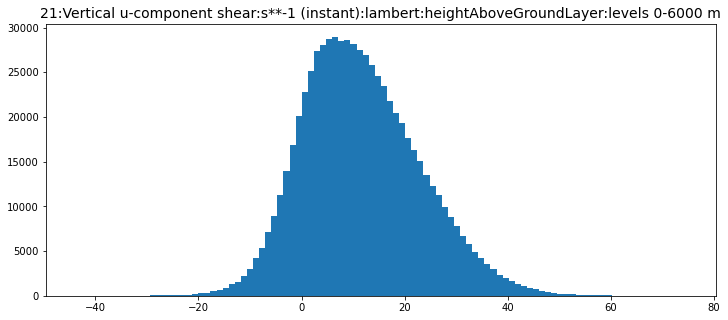

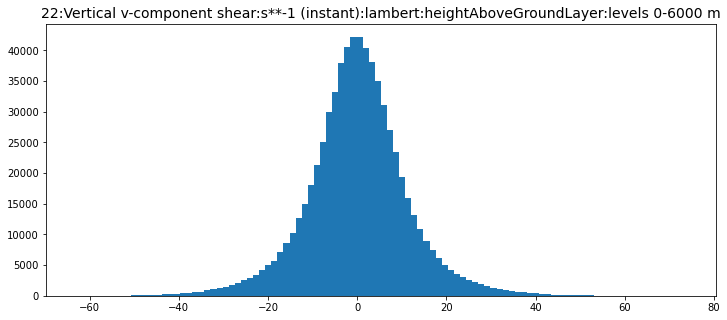

In [15]:
for i in range(23):
    
    print('# ========== {} ========== #'.format(names[i]))
    
    temp_var = HRRRv3_lead[:, ::50, ::50, i].ravel()
    temp_var_clean = temp_var[~np.isnan(temp_var)]

    temp_min = np.min(temp_var_clean)
    temp_max = np.max(temp_var_clean)
    temp_mean = np.mean(temp_var_clean)
    temp_std = np.std(temp_var_clean)
    temp_90 = np.quantile(temp_var_clean, 0.90)
    temp_95 = np.quantile(temp_var_clean, 0.95)
    
    print('Max: {}, Min: {}, Mean: {}, Std: {}\n90th: {}, 95th: {}'.format(temp_max, 
                                                                           temp_min, 
                                                                           temp_mean, 
                                                                           temp_std, 
                                                                           temp_90, 
                                                                           temp_95))
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    ax.hist(temp_var_clean, bins=100);
    ax.set_title('{}:{}'.format(i, names[i]), fontsize=14)
    

Text(0.5, 1.0, 'Normalized - 10 metre wind speed:m s**-1 (max):lambert:heightAboveGround:level 10 m')

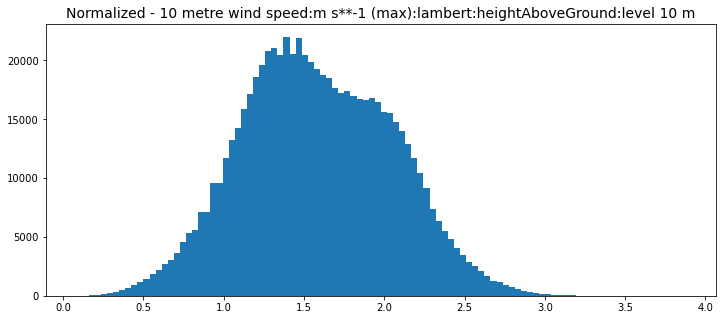

In [41]:
i = 13

temp_var = HRRRv3_lead[:, ::50, ::50, i].ravel()
temp_var_clean = temp_var[~np.isnan(temp_var)]

norm_ = np.log(temp_var_clean + 1)

fig = plt.figure(figsize=(12, 5))
ax = fig.gca()
ax.hist(norm_, bins=100);
ax.set_title('Normalized - {}'.format(names[i]), fontsize=14)



In [ ]:
i = 0
temp_var_clean[temp_var_clean<-10] = -10
norm_ = np.log(temp_var_clean+11)

In [ ]:
i = 1
norm_ = (temp_var_clean - 101300) / 700

In [ ]:
i = 10
norm_ = (temp_var_clean - 280) / 12